**TEXT PRE-PROCESSING**

In [2]:
# Install necessary libraries
!pip install pandas nltk scikit-learn

In [3]:
# Import Libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
# Load Datasets
train_df = pd.read_csv('/content/train.csv', encoding='utf-8')
valid_df = pd.read_csv('/content/valid.csv', encoding='utf-8')

In [5]:
print("Training Data:")
train_df.head()

Training Data:


,text,experience
0,चंद्रमोहन शर्मा को-प्रड्यूसर और लीड ऐक्टर अक्ष...,2
1,अगर आप इस फिल्म को देखने जा रहे हैं तो सबसे पह...,0
2,बॉलीवुड वाले चोरी-छिपे हॉलीवुड फिल्मों से कहान...,2
3,"बैनर :\nसंजय दत्त प्रोडक्शन्स प्रा.लि., रुपाली...",0
4,1959 में घटित चर्चित नानावटी कांड में एक क्राइ...,1


In [6]:
print("\nValidation Data:")
valid_df.head()


Validation Data:


,text,experience
0,"\n\nबैनर :\nनेक्स्ट जेन फिल्म्स प्रोडक्शन्स, इ...",2
1,इस शुक्रवार रिलीज हुई इकलौती इस हॉलिवुड मूवी क...,2
2,"\n\nबैनर :\nयूटीवी मोशन पिक्चर्स, टिप्स म्युजि...",1
3,"चंद्रमोहन शर्मा, नवभारत टाइम्स पिछले कुछ अर्से...",0
4,\n\nशनाया ग्रोवर (मंजरी फडणीस) पर हत्या का आरो...,0


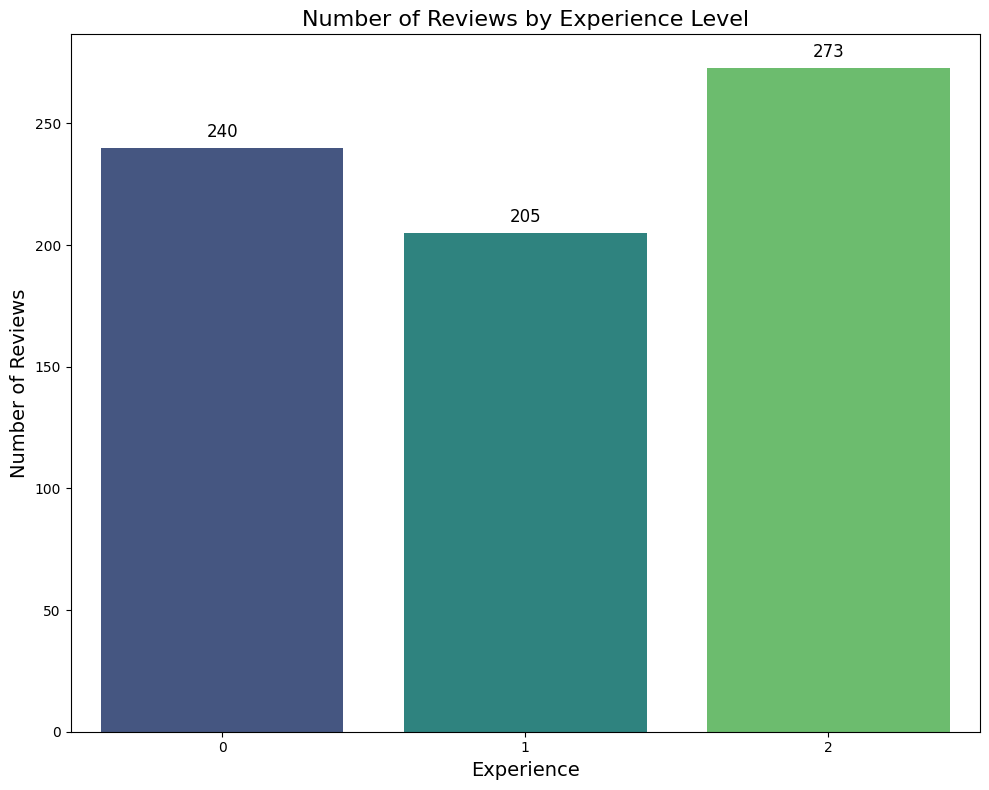

In [39]:
# Data Visualization (Optional)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

experience_counts = train_df['experience'].value_counts().reset_index()
experience_counts.columns = ['experience', 'number_of_reviews']

plt.figure(figsize=(10, 8))
bar_plot = sns.barplot(x='experience', y='number_of_reviews', data=experience_counts, palette='viridis')

for p in bar_plot.patches:
    bar_plot.annotate(format(int(p.get_height())),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom',
                      fontsize=12, color='black',
                      xytext=(0, 5),
                      textcoords='offset points')

plt.title('Number of Reviews by Experience Level', fontsize=16)
plt.xlabel('Experience', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.tight_layout()
plt.show()

warnings.resetwarnings()

In [8]:
# Text Preprocessing Functions
def validate_script(text):
    return ''.join([char for char in text if re.match(r'[\u0900-\u097F\s]', char)])

def word_tokenize_hindi(text):
    return word_tokenize(text)

def remove_stopwords(tokens, stop_words):
    return [word for word in tokens if word not in stop_words]

def stem_words(tokens, stemmer):
    return [stemmer.stem(word) for word in tokens]

# Initialize Stemmer and Stopwords
stemmer = PorterStemmer()
hindi_stop_words = set(['और', 'के', 'का', 'है', 'में', 'से', 'को', 'पर', 'कि', 'हैं', 'इस', 'जो', 'तक', 'ही', 'ने', 'वह', 'था'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
# Apply Preprocessing to Training Data
train_df['clean_text'] = train_df['text'].apply(validate_script)
train_df['tokens'] = train_df['clean_text'].apply(word_tokenize_hindi)
train_df['filtered_tokens'] = train_df['tokens'].apply(lambda x: remove_stopwords(x, hindi_stop_words))
train_df['stemmed_tokens'] = train_df['filtered_tokens'].apply(lambda x: stem_words(x, stemmer))
train_df['processed_text'] = train_df['stemmed_tokens'].apply(lambda x: ' '.join(x))

In [10]:
# Apply Preprocessing to Validation Data
valid_df['clean_text'] = valid_df['text'].apply(validate_script)
valid_df['tokens'] = valid_df['clean_text'].apply(word_tokenize_hindi)
valid_df['filtered_tokens'] = valid_df['tokens'].apply(lambda x: remove_stopwords(x, hindi_stop_words))
valid_df['stemmed_tokens'] = valid_df['filtered_tokens'].apply(lambda x: stem_words(x, stemmer))
valid_df['processed_text'] = valid_df['stemmed_tokens'].apply(lambda x: ' '.join(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
# Display Processed Text
print("Processed Training Text:")
train_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Processed Training Text:


,text,experience,clean_text,tokens,filtered_tokens,stemmed_tokens,processed_text
0,चंद्रमोहन शर्मा को-प्रड्यूसर और लीड ऐक्टर अक्ष...,2,चंद्रमोहन शर्मा कोप्रड्यूसर और लीड ऐक्टर अक्षय...,"[चंद्रमोहन, शर्मा, कोप्रड्यूसर, और, लीड, ऐक्टर...","[चंद्रमोहन, शर्मा, कोप्रड्यूसर, लीड, ऐक्टर, अक...","[चंद्रमोहन, शर्मा, कोप्रड्यूसर, लीड, ऐक्टर, अक...",चंद्रमोहन शर्मा कोप्रड्यूसर लीड ऐक्टर अक्षय कु...
1,अगर आप इस फिल्म को देखने जा रहे हैं तो सबसे पह...,0,अगर आप इस फिल्म को देखने जा रहे हैं तो सबसे पह...,"[अगर, आप, इस, फिल्म, को, देखने, जा, रहे, हैं, ...","[अगर, आप, फिल्म, देखने, जा, रहे, तो, सबसे, पहल...","[अगर, आप, फिल्म, देखने, जा, रहे, तो, सबसे, पहल...",अगर आप फिल्म देखने जा रहे तो सबसे पहले तो आप य...
2,बॉलीवुड वाले चोरी-छिपे हॉलीवुड फिल्मों से कहान...,2,बॉलीवुड वाले चोरीछिपे हॉलीवुड फिल्मों से कहानि...,"[बॉलीवुड, वाले, चोरीछिपे, हॉलीवुड, फिल्मों, से...","[बॉलीवुड, वाले, चोरीछिपे, हॉलीवुड, फिल्मों, कह...","[बॉलीवुड, वाले, चोरीछिपे, हॉलीवुड, फिल्मों, कह...",बॉलीवुड वाले चोरीछिपे हॉलीवुड फिल्मों कहानियां...
3,"बैनर :\nसंजय दत्त प्रोडक्शन्स प्रा.लि., रुपाली...",0,बैनर \nसंजय दत्त प्रोडक्शन्स प्रालि रुपाली ओम ...,"[बैनर, संजय, दत्त, प्रोडक्शन्स, प्रालि, रुपाली...","[बैनर, संजय, दत्त, प्रोडक्शन्स, प्रालि, रुपाली...","[बैनर, संजय, दत्त, प्रोडक्शन्स, प्रालि, रुपाली...",बैनर संजय दत्त प्रोडक्शन्स प्रालि रुपाली ओम एं...
4,1959 में घटित चर्चित नानावटी कांड में एक क्राइ...,1,में घटित चर्चित नानावटी कांड में एक क्राइम थ्...,"[में, घटित, चर्चित, नानावटी, कांड, में, एक, क्...","[घटित, चर्चित, नानावटी, कांड, एक, क्राइम, थ्रि...","[घटित, चर्चित, नानावटी, कांड, एक, क्राइम, थ्रि...",घटित चर्चित नानावटी कांड एक क्राइम थ्रिलर बनने...


In [12]:
print("\nProcessed Validation Text:")
valid_df.head()


Processed Validation Text:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text,experience,clean_text,tokens,filtered_tokens,stemmed_tokens,processed_text
0,"\n\nबैनर :\nनेक्स्ट जेन फिल्म्स प्रोडक्शन्स, इ...",2,\n\nबैनर \nनेक्स्ट जेन फिल्म्स प्रोडक्शन्स इरो...,"[बैनर, नेक्स्ट, जेन, फिल्म्स, प्रोडक्शन्स, इरो...","[बैनर, नेक्स्ट, जेन, फिल्म्स, प्रोडक्शन्स, इरो...","[बैनर, नेक्स्ट, जेन, फिल्म्स, प्रोडक्शन्स, इरो...",बैनर नेक्स्ट जेन फिल्म्स प्रोडक्शन्स इरोज इंटर...
1,इस शुक्रवार रिलीज हुई इकलौती इस हॉलिवुड मूवी क...,2,इस शुक्रवार रिलीज हुई इकलौती इस हॉलिवुड मूवी क...,"[इस, शुक्रवार, रिलीज, हुई, इकलौती, इस, हॉलिवुड...","[शुक्रवार, रिलीज, हुई, इकलौती, हॉलिवुड, मूवी, ...","[शुक्रवार, रिलीज, हुई, इकलौती, हॉलिवुड, मूवी, ...",शुक्रवार रिलीज हुई इकलौती हॉलिवुड मूवी पहला पा...
2,"\n\nबैनर :\nयूटीवी मोशन पिक्चर्स, टिप्स म्युजि...",1,\n\nबैनर \nयूटीवी मोशन पिक्चर्स टिप्स म्युजिक ...,"[बैनर, यूटीवी, मोशन, पिक्चर्स, टिप्स, म्युजिक,...","[बैनर, यूटीवी, मोशन, पिक्चर्स, टिप्स, म्युजिक,...","[बैनर, यूटीवी, मोशन, पिक्चर्स, टिप्स, म्युजिक,...",बैनर यूटीवी मोशन पिक्चर्स टिप्स म्युजिक फिल्म्...
3,"चंद्रमोहन शर्मा, नवभारत टाइम्स पिछले कुछ अर्से...",0,चंद्रमोहन शर्मा नवभारत टाइम्स पिछले कुछ अर्से ...,"[चंद्रमोहन, शर्मा, नवभारत, टाइम्स, पिछले, कुछ,...","[चंद्रमोहन, शर्मा, नवभारत, टाइम्स, पिछले, कुछ,...","[चंद्रमोहन, शर्मा, नवभारत, टाइम्स, पिछले, कुछ,...",चंद्रमोहन शर्मा नवभारत टाइम्स पिछले कुछ अर्से ...
4,\n\nशनाया ग्रोवर (मंजरी फडणीस) पर हत्या का आरो...,0,\n\nशनाया ग्रोवर मंजरी फडणीस पर हत्या का आरोप ...,"[शनाया, ग्रोवर, मंजरी, फडणीस, पर, हत्या, का, आ...","[शनाया, ग्रोवर, मंजरी, फडणीस, हत्या, आरोप, है।...","[शनाया, ग्रोवर, मंजरी, फडणीस, हत्या, आरोप, है।...",शनाया ग्रोवर मंजरी फडणीस हत्या आरोप है। एक साम...


In [13]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['processed_text'])
X_valid_tfidf = tfidf_vectorizer.transform(valid_df['processed_text'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
print(f"Training TF-IDF shape: {X_train_tfidf.shape}")
print(f"Validation TF-IDF shape: {X_valid_tfidf.shape}")

Training TF-IDF shape: (718, 5000)
Validation TF-IDF shape: (180, 5000)


In [15]:
# Prepare Labels
y_train = train_df['experience']
y_valid = valid_df['experience']

print("\nTraining Label Distribution:")
print(y_train.value_counts())

print("\nValidation Label Distribution:")
print(y_valid.value_counts())


Training Label Distribution:
experience
2    273
0    240
1    205
Name: count, dtype: int64

Validation Label Distribution:
experience
1    65
2    62
0    53
Name: count, dtype: int64


In [16]:
# Optional: Encode Labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_valid_encoded = label_encoder.transform(y_valid)

print("\nEncoded Training Labels:")
print(y_train_encoded[:10])

print("\nEncoded Validation Labels:")
print(y_valid_encoded[:10])

# Optional: Save Preprocessed Data
train_df.to_csv('/content/train_preprocessed.csv', index=False)
valid_df.to_csv('/content/valid_preprocessed.csv', index=False)

print("\nPreprocessed data saved successfully.")


Encoded Training Labels:
[2 0 2 0 1 1 2 2 0 2]

Encoded Validation Labels:
[2 2 1 0 0 1 1 1 1 2]


<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()



Preprocessed data saved successfully.


**MODEL TRAINING AND PERFORMANCE EVALUATION**

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
# Initialize Models
nb_model = MultinomialNB()
svm_model = SVC(kernel='linear')
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
lr_model = LogisticRegression(max_iter=1000, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

In [19]:
# Train Naive Bayes
nb_model.fit(X_train_tfidf, y_train_encoded)
nb_pred = nb_model.predict(X_valid_tfidf)
print("Naive Bayes Accuracy:", accuracy_score(y_valid_encoded, nb_pred))
print(confusion_matrix(y_valid_encoded, nb_pred))
print(classification_report(y_valid_encoded, nb_pred))

Naive Bayes Accuracy: 0.4444444444444444
[[22  0 31]
 [10  3 52]
 [ 6  1 55]]
              precision    recall  f1-score   support

           0       0.58      0.42      0.48        53
           1       0.75      0.05      0.09        65
           2       0.40      0.89      0.55        62

    accuracy                           0.44       180
   macro avg       0.58      0.45      0.37       180
weighted avg       0.58      0.44      0.36       180



In [20]:
# Train SVM
svm_model.fit(X_train_tfidf, y_train_encoded)
svm_pred = svm_model.predict(X_valid_tfidf)
print("SVM Accuracy:", accuracy_score(y_valid_encoded, svm_pred))
print(confusion_matrix(y_valid_encoded, svm_pred))
print(classification_report(y_valid_encoded, svm_pred))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SVM Accuracy: 0.6111111111111112
[[33 12  8]
 [13 35 17]
 [13  7 42]]
              precision    recall  f1-score   support

           0       0.56      0.62      0.59        53
           1       0.65      0.54      0.59        65
           2       0.63      0.68      0.65        62

    accuracy                           0.61       180
   macro avg       0.61      0.61      0.61       180
weighted avg       0.61      0.61      0.61       180



In [21]:
# Train Random Forest
rf_model.fit(X_train_tfidf, y_train_encoded)
rf_pred = rf_model.predict(X_valid_tfidf)
print("Random Forest Accuracy:", accuracy_score(y_valid_encoded, rf_pred))
print(confusion_matrix(y_valid_encoded, rf_pred))
print(classification_report(y_valid_encoded, rf_pred))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Random Forest Accuracy: 0.5444444444444444
[[32  7 14]
 [19 20 26]
 [12  4 46]]
              precision    recall  f1-score   support

           0       0.51      0.60      0.55        53
           1       0.65      0.31      0.42        65
           2       0.53      0.74      0.62        62

    accuracy                           0.54       180
   macro avg       0.56      0.55      0.53       180
weighted avg       0.57      0.54      0.53       180



In [22]:
# Train Logistic Regression
lr_model.fit(X_train_tfidf, y_train_encoded)
lr_pred = lr_model.predict(X_valid_tfidf)
print("Logistic Regression Accuracy:", accuracy_score(y_valid_encoded, lr_pred))
print(confusion_matrix(y_valid_encoded, lr_pred))
print(classification_report(y_valid_encoded, lr_pred))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Logistic Regression Accuracy: 0.5944444444444444
[[30 12 11]
 [14 29 22]
 [11  3 48]]
              precision    recall  f1-score   support

           0       0.55      0.57      0.56        53
           1       0.66      0.45      0.53        65
           2       0.59      0.77      0.67        62

    accuracy                           0.59       180
   macro avg       0.60      0.60      0.59       180
weighted avg       0.60      0.59      0.59       180



In [23]:
# Train Decision Tree
dt_model.fit(X_train_tfidf, y_train_encoded)
dt_pred = dt_model.predict(X_valid_tfidf)
print("Decision Tree Accuracy:", accuracy_score(y_valid_encoded, dt_pred))
print(confusion_matrix(y_valid_encoded, dt_pred))
print(classification_report(y_valid_encoded, dt_pred))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Decision Tree Accuracy: 0.5
[[28  9 16]
 [19 24 22]
 [11 13 38]]
              precision    recall  f1-score   support

           0       0.48      0.53      0.50        53
           1       0.52      0.37      0.43        65
           2       0.50      0.61      0.55        62

    accuracy                           0.50       180
   macro avg       0.50      0.50      0.50       180
weighted avg       0.50      0.50      0.49       180



In [44]:
# Compare Model Performance
models = ['Naive Bayes', 'SVM', 'Random Forest', 'Logistic Regression', 'Decision Tree']
accuracy_scores = [
    accuracy_score(y_valid_encoded, nb_pred),
    accuracy_score(y_valid_encoded, svm_pred),
    accuracy_score(y_valid_encoded, rf_pred),
    accuracy_score(y_valid_encoded, lr_pred),
    accuracy_score(y_valid_encoded, dt_pred)
]

comparison_df = pd.DataFrame({'Model': models, 'Accuracy': accuracy_scores})
print("\nModel Comparison:")
print(comparison_df)


Model Comparison:
                 Model  Accuracy
0          Naive Bayes  0.444444
1                  SVM  0.611111
2        Random Forest  0.544444
3  Logistic Regression  0.594444
4        Decision Tree  0.500000


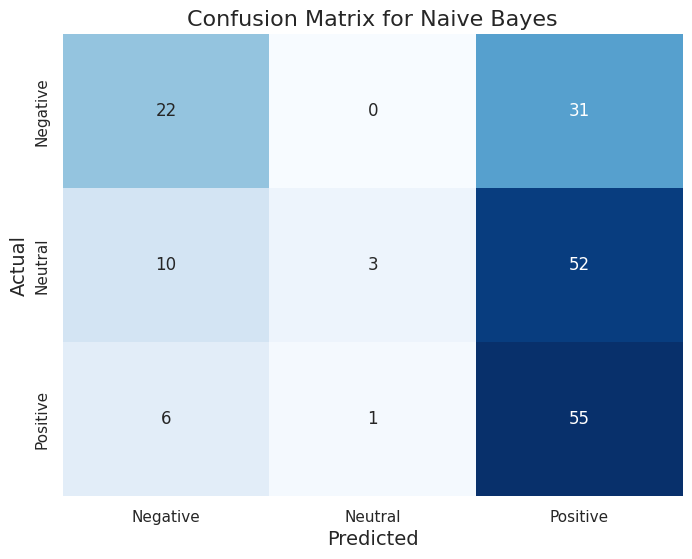

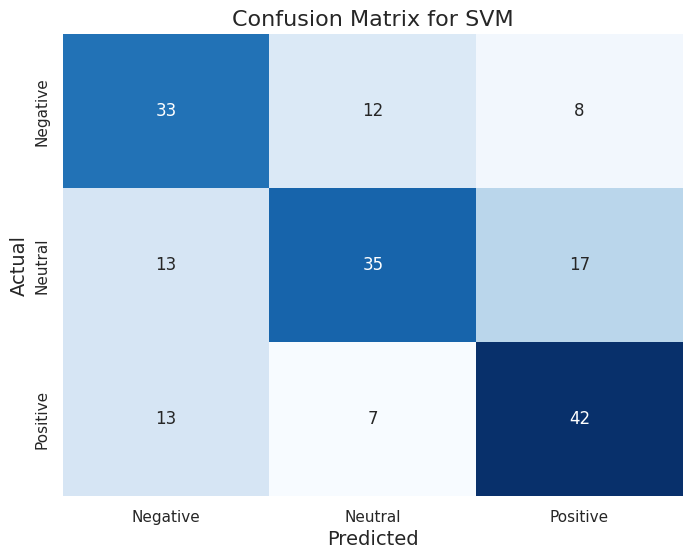

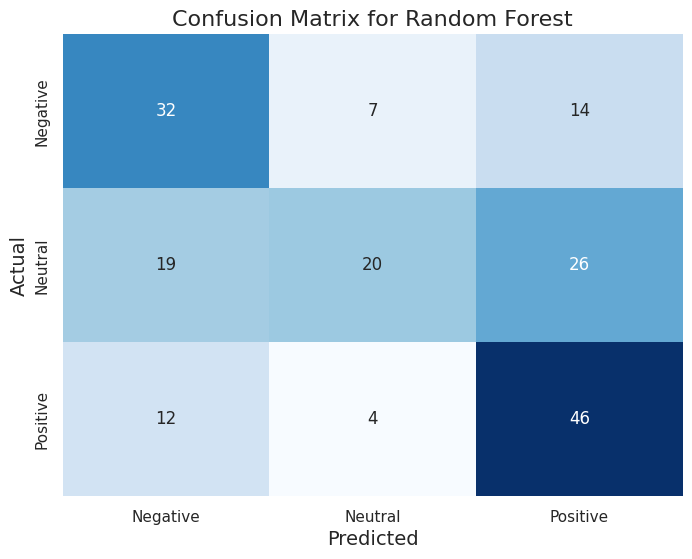

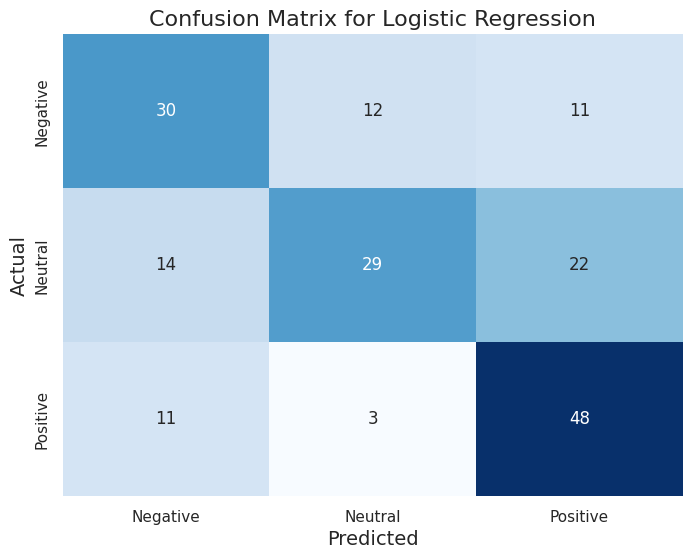

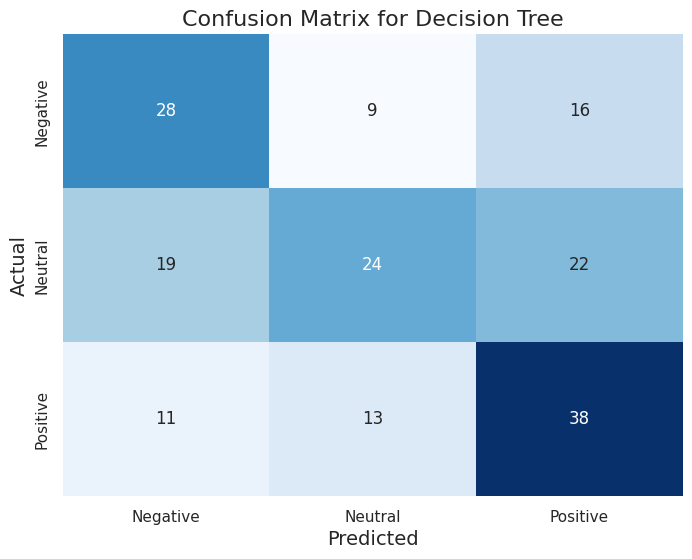

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Negative', 'Neutral', 'Positive'],
                yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.title(f'Confusion Matrix for {model_name}', fontsize=16)
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('Actual', fontsize=14)
    plt.show()

# Plot confusion matrices for each model
plot_confusion_matrix(y_valid_encoded, nb_pred, 'Naive Bayes')
plot_confusion_matrix(y_valid_encoded, svm_pred, 'SVM')
plot_confusion_matrix(y_valid_encoded, rf_pred, 'Random Forest')
plot_confusion_matrix(y_valid_encoded, lr_pred, 'Logistic Regression')
plot_confusion_matrix(y_valid_encoded, dt_pred, 'Decision Tree')

# **TESTING OF MODEL**

In [25]:
# Import Libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Function to validate and preprocess Hindi text
def validate_script(text):
    return ''.join([char for char in text if re.match(r'[\u0900-\u097F\s]', char)])

def word_tokenize_hindi(text):
    return word_tokenize(text)

def remove_stopwords(tokens, stop_words):
    return [word for word in tokens if word not in stop_words]

def stem_words(tokens, stemmer):
    return [stemmer.stem(word) for word in tokens]

# Initialize Stemmer and Stopwords
stemmer = nltk.PorterStemmer()
hindi_stop_words = set(['और', 'के', 'का', 'है', 'में', 'से', 'को', 'पर', 'कि',
                        'हैं', 'इस', 'जो', 'तक', 'ही', 'ने', 'वह', 'था'])

# Preprocess user input
def preprocess_text(text):
    clean_text = validate_script(text)
    tokens = word_tokenize_hindi(clean_text)
    filtered_tokens = remove_stopwords(tokens, hindi_stop_words)
    stemmed_tokens = stem_words(filtered_tokens, stemmer)
    return ' '.join(stemmed_tokens)

# Load and preprocess training data (you can modify the file path)
train_df = pd.read_csv('/content/train.csv', encoding='utf-8')

# Apply preprocessing to the training data
train_df['clean_text'] = train_df['text'].apply(validate_script)
train_df['tokens'] = train_df['clean_text'].apply(word_tokenize_hindi)
train_df['filtered_tokens'] = train_df['tokens'].apply(lambda x: remove_stopwords(x, hindi_stop_words))
train_df['stemmed_tokens'] = train_df['filtered_tokens'].apply(lambda x: stem_words(x, stemmer))
train_df['processed_text'] = train_df['stemmed_tokens'].apply(lambda x: ' '.join(x))

# Prepare Labels
y_train = train_df['experience']  # Assuming 'experience' is the target variable

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['processed_text'])

# Optional: Encode Labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Initialize Models
nb_model = MultinomialNB()
svm_model = SVC(kernel='linear')
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
lr_model = LogisticRegression(max_iter=1000, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

# Train the models
nb_model.fit(X_train_tfidf, y_train_encoded)
svm_model.fit(X_train_tfidf, y_train_encoded)
rf_model.fit(X_train_tfidf, y_train_encoded)
lr_model.fit(X_train_tfidf, y_train_encoded)
dt_model.fit(X_train_tfidf, y_train_encoded)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWa

DecisionTreeClassifier(random_state=42)

In [26]:
# Function to map sentiment predictions to labels
def map_sentiment_label(prediction):
    if prediction == 0:
        return 'negative'
    elif prediction == 1:
        return 'neutral'
    elif prediction == 2:
        return 'positive'

# Modify the predict_sentiment function to include sentiment label mapping
def predict_sentiment(review):
    processed_review = preprocess_text(review)
    review_tfidf = tfidf_vectorizer.transform([processed_review])

    predictions = {}

    # Naive Bayes
    nb_pred = nb_model.predict(review_tfidf)
    predictions['Naive Bayes'] = map_sentiment_label(nb_pred[0])

    # SVM
    svm_pred = svm_model.predict(review_tfidf)
    predictions['SVM'] = map_sentiment_label(svm_pred[0])

    # Random Forest
    rf_pred = rf_model.predict(review_tfidf)
    predictions['Random Forest'] = map_sentiment_label(rf_pred[0])

    # Logistic Regression
    lr_pred = lr_model.predict(review_tfidf)
    predictions['Logistic Regression'] = map_sentiment_label(lr_pred[0])

    # Decision Tree
    dt_pred = dt_model.predict(review_tfidf)
    predictions['Decision Tree'] = map_sentiment_label(dt_pred[0])

    return predictions

# Take user input for a Hindi movie review
user_review = input("Enter a Hindi movie review: ")

# Predict sentiment using all models
sentiment_predictions = predict_sentiment(user_review)

# Display predictions
print("\nSentiment Predictions:")
for model, sentiment in sentiment_predictions.items():
    print(f"{model}: {sentiment}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Enter a Hindi movie review: मार्वल स्टुडियोज़ की फिल्मों में इन दिनों ढेर सारे सुपरहीरोज़ को एक साथ देखने को मिलता है और सुपरहीरो के फैंस को यह बात थिएटर तक खींच लाती है, हालांकि 'बेटमैन ‍वर्सेस सुपरमैन: डान ऑफ जस्टिस' को बहुत ज्यादा पसंद नहीं किया गया था, लेकिन 'कैप्टन अमेरिका : सिविल वॉर' उम्मीदों पर खरी उतरती है।  यहां सुपरहीरोज़ दो टीमों में बंटे हुए नजर आए जो एक-दूसरे के खिलाफ लड़ते हैं, लेकिन केवल इसी बात के बूते दर्शकों को बांधा नहीं जा सकता। एक मजबूत कहानी आपको सीट से चिपकाए रखती है और कहीं भी यह फिल्म खींची हुई नहीं लगती।   कैप्टन अमेरिका: सिविल वॉर 2011 में आई 'कैप्टन अमेरिका: द फर्स्ट अवेंजर' तथा 2014 में प्रदर्शित हुई 'कैप्टन अमेरिका- द विंटर सोल्जर' की अगली कड़ी है। एवेंजर्स: एज ऑफ अल्ट्रॉन की घटना के लगभग एक वर्ष बाद नाइजीरिया में जैविक हथियार चोरी को रोकने के दौरान सुपरहीरोज़ के हाथों कुछ लोगों की मृत्यु हो जाती है और इससे एवेंजर्स के काम करने के तरीकों के प्रति अविश्वास बढ़ जाता है।    सुपरहीरोज़ की मनमानी को रोकने के लिए 137 देशों के समर्थन के साथ संयुक्त राष्ट्र संघ त

# **CODE FOR GUI RUN IN SEQUENCE**

In [27]:
import joblib

# After training your models:
joblib.dump(nb_model, 'nb_model.pkl')
joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(lr_model, 'lr_model.pkl')
joblib.dump(dt_model, 'dt_model.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

# **CREATE/UPLOAD AN EMPTY A FILE APP.PY BEFORE YOU RUN THIS CELL**

In [33]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 77.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.2 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/google/colab/_pip.py:86: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.10/dist-packages/gitdb-4.0.11.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):
/usr/local/lib/python3.10/dist-packages/google/colab/_pip.py:86: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.10/dist-packages/GitPython-3.1.43.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):
/usr/local/lib/python3.10/dist-packages/google/colab/_pip.py:86: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.10/dist-packages/pydeck-0.9.1.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):
/usr/local/lib/python3.10/dist-packages/google/colab/_pip.py:86: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.10/dist-packages/smmap-5.0.1.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  f

In [34]:
%%writefile app.py
import streamlit as st
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import joblib

# Load models and vectorizer
nb_model = joblib.load('nb_model.pkl')
svm_model = joblib.load('svm_model.pkl')
rf_model = joblib.load('rf_model.pkl')
lr_model = joblib.load('lr_model.pkl')
dt_model = joblib.load('dt_model.pkl')
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')

nltk.download('punkt')

def validate_script(text):
    return ''.join([char for char in text if re.match(r'[\u0900-\u097F\s]', char)])

def preprocess_text(text):
    clean_text = validate_script(text)
    tokens = word_tokenize(clean_text)
    hindi_stop_words = set(['और', 'के', 'का', 'है', 'में', 'से', 'को', 'पर', 'कि',
                            'हैं', 'इस', 'जो', 'तक', 'ही', 'ने', 'वह', 'था'])
    filtered_tokens = [word for word in tokens if word not in hindi_stop_words]
    return ' '.join(filtered_tokens)

# Streamlit App
st.title("Hindi Movie Review Sentiment Analysis")

review = st.text_area("Enter a Hindi movie review:")
if st.button("Analyze"):
    processed_review = preprocess_text(review)
    review_tfidf = tfidf_vectorizer.transform([processed_review])

    predictions = {
        "Naive Bayes": nb_model.predict(review_tfidf)[0],
        "SVM": svm_model.predict(review_tfidf)[0],
        "Random Forest": rf_model.predict(review_tfidf)[0],
        "Logistic Regression": lr_model.predict(review_tfidf)[0],
        "Decision Tree": dt_model.predict(review_tfidf)[0],
    }

    st.subheader("Sentiment Predictions:")
    for model, pred in predictions.items():
        sentiment = "Positive" if pred == 2 else "Neutral" if pred == 1 else "Negative"
        st.write(f"{model}: {sentiment}")

Overwriting app.py


In [35]:
!wget -q -O - ipv4.icanhazip.com

35.247.113.39


**COPY THE OUPUT OF PREVIOUS CELL** AND CONTROL+CLICK ON **YOUR URL:** THE URL LINK IT WILL BE REDIRECTED TO ANOTHER PAGE PASTE YOUR LINK THEIR AND PRESS SUBMIT TO SEE GUI

In [54]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.247.113.39:8501

your url is: https://three-dragons-care.loca.lt
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
  Stopping...
^C


Some sample outputs
1. फिल्म में कहानी में कुछ नई बातें देखने को मिलीं, लेकिन यह कोई खास असर नहीं छोड़ पाई। एक बार देखने लायक है, लेकिन मैं इसे दोबारा नहीं देखूंगा।
2. फिल्म में कुछ रोचक क्षण थे और कई पात्रों का अभिनय ठीक था। कहानी सामान्य थी और कुछ विशेष नहीं लगी।
3. कहानी का प्रवाह ठीक था और फिल्म में कुछ मजेदार पल भी थे। हालांकि, यह किसी भी तरह से विशेष नहीं थी।
4. कहानी में कई मोड़ थे, लेकिन मुझे नहीं पता कि ये मोड़ कितने जरूरी थे।
5. अभिनेताओं ने अच्छा काम किया है, पर कहानी में कुछ कमी लगती है।
6. म्यूजिक अच्छा है, लेकिन फिल्म की लंबाई थोड़ी ज्यादा लगती है।
7. यह फिल्म बहुत ही शानदार है! इसके संवाद, अभिनय और संगीत ने मुझे मंत्रमुग्ध कर दिया। कहानी बहुत दिलचस्प है और इसे देखने का अनुभव अद्भुत था।
8. यह फिल्म मेरे लिए एक निराशाजनक अनुभव थी। प्लॉट में बहुत सारे झोल थे और इसका अंत भी बहुत खराब था। मैं इसे देखने का समय बर्बाद नहीं करना चाहता।
9. फिल्म ठीक-ठाक है। न तो यह बहुत अच्छी है और न ही बहुत बुरी। कुछ दृश्य अच्छे थे, लेकिन कुल मिलाकर, यह एक साधारण मनोरंजन है।
10. इस फिल्म में एक्शन और ड्रामा का अच्छा मिश्रण है, लेकिन कहानी में गहराई की कमी थी। कलाकारों ने ठीक-ठाक अभिनय किया है।